# Bayes ratios

In [9]:
import json 

def get_evidence(path):


    # Opening JSON file
    f = open(path)

    # returns JSON object as 
    # a dictionary
    data = json.load(f)


    return data["log_evidence"]




def parse_filename(f):

    return float(f.split('_')[3]) #this is the h value


def bayes_factor(f1,f2):


    evidence1 = get_evidence(f1)
    evidence2 = get_evidence(f2)

    print(f1, evidence1)
    print(f2, evidence2)
    return evidence1-evidence2


In [3]:
import glob 


list_of_model_files = sorted(glob.glob("../data/nested_sampling/Bayes/*earth*.json"))
list_of_null_files = sorted(glob.glob("../data/nested_sampling/Bayes/*null*.json"))

In [ ]:
list_of_model_files

In [4]:

import numpy as np 
N = len(list_of_model_files)

strains = np.zeros(N)
bayes_factors = np.zeros(N) 
for i in range(N):
    print(i)
    assert parse_filename(list_of_model_files[i]),parse_filename(list_of_null_files[i]) #check h of each file is the same

    strains[i] = parse_filename(list_of_model_files[i])
    bayes_factors[i] =  bayes_factor(list_of_model_files[i],list_of_null_files[i])
 



In [5]:
#sort in order of strain
p = strains.argsort()
x = strains[p]
y = bayes_factors[p]

In [6]:
#Save output as np array
data_output = np.zeros((len(x),2))
data_output[:,0] = x 
data_output[:,1] = y
np.save("../data/PaperBayesFile",data_output)

In [7]:
import numpy as np 
data = np.load("../data/PaperBayesFile.npy") 
x = data[:,0]
y = data[:,1]

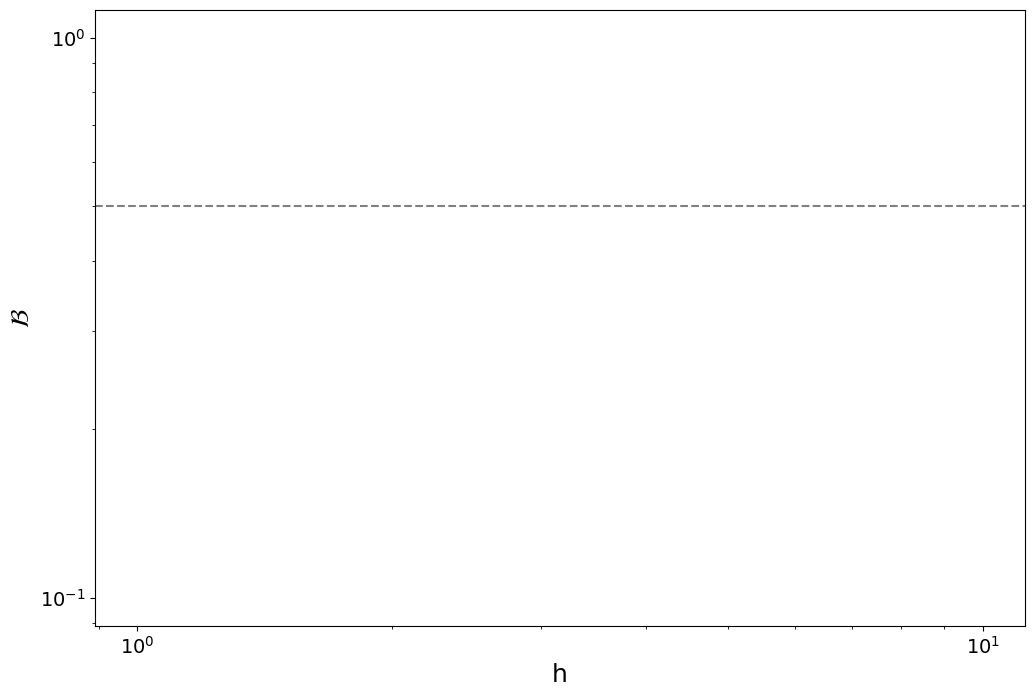

In [8]:
import matplotlib.pyplot as plt 
import scienceplots


h,w = 12,8
rows = 1
cols = 1
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(h,w))


ax.scatter(x,y)
ax.plot(x,y)

ax.set_xscale('log')
ax.set_yscale('log')



fs=18
ax.set_xlabel('h', fontsize=fs)
ax.set_ylabel(r'$\mathcal{B}$', fontsize=fs)

ax.xaxis.set_tick_params(labelsize=fs-4)
ax.yaxis.set_tick_params(labelsize=fs-4)

ax.axhline(0.5,linestyle='--', c='0.5')

plt.savefig(f"../data/images/PaperBayesRatioPlot_stacked.png", bbox_inches="tight",dpi=300)
